# Exploratory Data Analysis

This notebook will explore variables from the cleaned loan dataset and their relationship to the binary Target variable. For Target classification, a 1 indicates that an applicant was unable to pay back the loan and a 0 indicates that an applicant did repay the loan. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
#Set option so all columns can be seen for exploratory data analysis
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Read in cleaned dataset file
df = pd.read_csv('cleaned_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000,0.1502,0.1010,0.9806,0.7452,0.0587,0.1611,0.1379,0.3333,0.3750,0.0952,0.1313,0.1456,0.0000,0.0000,0.1489,0.0973,0.9806,0.7383,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000,reg oper account,block of flats,0.1417,Panel,No,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,-615.0,-2056,0.0,1,1,0,1,0,0,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.721940,0.642656,NaN,0.3495,0.1335,0.9985,0.9796,0.1143,0.40,0.1724,0.6667,0.7083,0.1758,0.2849,0.3774,0.0193,0.1001,0.3561,0.1386,0.9985,0.9804,0.1153,0.4028,0.1724,0.6667,0.70

In [3]:
df.shape

(80603, 122)

Let's first explore the overall rate of defaulters and non-defaulters and then we will examine the rate grouped by other features. 

In [4]:
#Function to check the rate of loan default

def default_rate(df, col):
    print(df[col].value_counts())
    paid = (df[col].value_counts()[0])/(df[col].value_counts()[0]+df[col].value_counts()[1])
    print("Loan Repaid on Time:", round(paid*100,2),"%")
    print("Loan Defaulted:", round((1-paid)*100,2),"%")

default_rate(df, 'TARGET')

0    61372
1    19231
Name: TARGET, dtype: int64
Loan Repaid on Time: 76.14 %
Loan Defaulted: 23.86 %


This is an imbalanced class problem, where the number of borrowers who paid their loan back is far greater than the borrowers who defaulted on their loan. Next, we will see if gender plays a part in default rate.

Text(0.5,1,'Default Count by Gender')

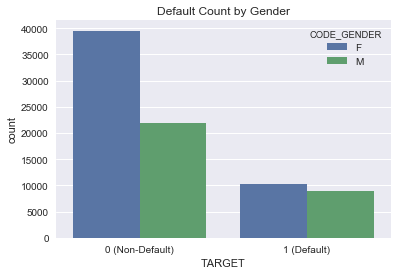

In [5]:
sns.set(style="darkgrid")
gen = sns.countplot(x = 'TARGET', hue = 'CODE_GENDER', data = df)
gen.set_xticklabels(['0 (Non-Default)', '1 (Default)'])
plt.title('Default Count by Gender')

In [6]:
female_def = (len(df[(df.TARGET ==1) & (df.CODE_GENDER == 'F')])/len(df[df.TARGET == 1]))*100
male_def = (len(df[(df.TARGET ==1) & (df.CODE_GENDER == 'M')])/len(df[df.TARGET == 1]))*100
female_repaid = (len(df[(df.TARGET ==0) & (df.CODE_GENDER == 'F')])/len(df[df.TARGET == 0]))*100
male_repaid = (len(df[(df.TARGET ==0) & (df.CODE_GENDER == 'M')])/len(df[df.TARGET == 0]))*100
all_female_def = (len(df[(df.TARGET ==1) & (df.CODE_GENDER == 'F')])/len(df[df.CODE_GENDER == 'F']))*100
all_male_def = (len(df[(df.TARGET ==1) & (df.CODE_GENDER == 'M')])/len(df[df.CODE_GENDER == 'M']))*100


print('Female Rate of Default (as % of total default):', round(female_def,2),"%", 'Count:',len(df[(df.TARGET ==1) & (df.CODE_GENDER == 'F')]))
print('Male Rate of Default (as % of total default):', round(male_def,2), "%", 'Count:',len(df[(df.TARGET ==1) & (df.CODE_GENDER == 'M')]))
print('Female Rate of Repayment (as % of total repaid):', round(female_repaid,2),"%", 'Count:',len(df[(df.TARGET ==0) & (df.CODE_GENDER == 'F')]))
print('Male Rate of Repayment (as % of total repaid):', round(male_repaid,2),"%", 'Count:',len(df[(df.TARGET ==0) & (df.CODE_GENDER == 'M')]))

print('Female Rate of Default among all females:', round(all_female_def, 2),'%')
print('Male Rate of Default among all males:',(round(all_male_def, 2)),'%')

Female Rate of Default (as % of total default): 53.69 % Count: 10325
Male Rate of Default (as % of total default): 46.31 % Count: 8906
Female Rate of Repayment (as % of total repaid): 64.38 % Count: 39512
Male Rate of Repayment (as % of total repaid): 35.62 % Count: 21860
Female Rate of Default among all females: 20.72 %
Male Rate of Default among all males: 28.95 %


In absolute numbers, there are more female defaulters than male defaulters. However, there are also more female applicants that repaid their loan. When we compare percentage of defaulters by gender, we can see that males have a higher rate of default at 28.95% than females at 20.72%.

Let's next examine the age distribution of loan holders and their default rates. First, we will write a function to convert columns that are represented in negative days to years elapsed for clarity. The function will take in two arguments: a dataframe and a list of columns to convert into years.

In [7]:
def days_to_years(df, days_list):
    for i in days_list:
        df[i] = df[i]/-365
        df.rename(columns = {i:'YEARS'+i[4:]}, inplace = True)

In [8]:
days_to_years(df, ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'])

In [9]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,38.591781,8.295890,1.761644,13.454795,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000,0.1502,0.1010,0.9806,0.7452,0.0587,0.1611,0.1379,0.3333,0.3750,0.0952,0.1313,0.1456,0.0000,0.0000,0.1489,0.0973,0.9806,0.7383,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000,reg oper account,block of flats,0.1417,Panel,No,0.0,0.0,0.0,0.0,0.010959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,39.953425,0.556164,1.684932,5.632877,0.0,1,1,0,1,0,0,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.721940,0.642656,NaN,0.3495,0.1335,0.9985,0.9796,0.1143,0.40,0.1724,0.6667,0.7083,0.1758,0.2849,0.3774,0.0193,0.1001,0.3561,0.1386,

Columns with negative days have been converted to positive years.

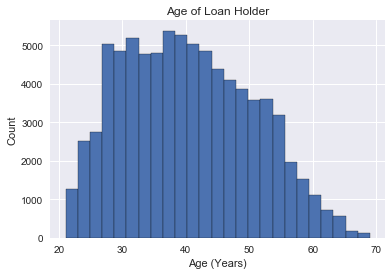

count    80603.000000
mean        40.359068
std         10.169000
min         21.035616
25%         31.995890
50%         39.654795
75%         48.041096
max         68.986301
Name: YEARS_BIRTH, dtype: float64


In [10]:
plt.hist(df['YEARS_BIRTH'], bins = 25, edgecolor = 'k')
plt.title('Age of Loan Holder')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

print(df['YEARS_BIRTH'].describe())

Text(0,0.5,'Density')

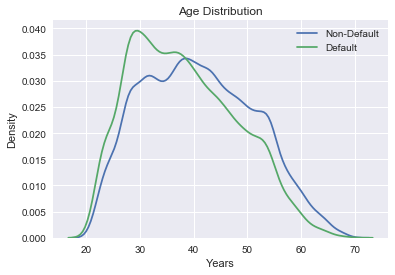

In [11]:
sns.kdeplot(df.loc[df['TARGET'] == 0, 'YEARS_BIRTH'], label = 'Non-Default')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'YEARS_BIRTH'], label = 'Default')
plt.title('Age Distribution')
plt.xlabel('Years')
plt.ylabel('Density')

Looking at the Kernel Density Estimation Plot, it is evident that younger loan holders consistently have higher rates of default than older loan holders. The trend seems to reverse at around the age of 38. Let's now examine the distribution and density plot of years employed.

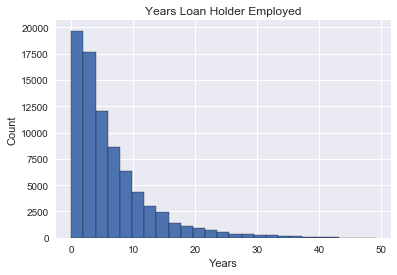

count    80603.000000
mean         6.401075
std          6.417516
min         -0.000000
25%          2.010959
50%          4.350685
75%          8.534247
max         49.073973
Name: YEARS_EMPLOYED, dtype: float64


In [12]:
plt.hist(df['YEARS_EMPLOYED'], bins = 25, edgecolor = 'k')
plt.title('Years Loan Holder Employed')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

print(df['YEARS_EMPLOYED'].describe())

Text(0,0.5,'Density')

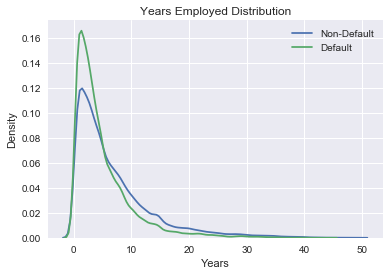

In [13]:
sns.kdeplot(df.loc[df['TARGET'] == 0, 'YEARS_EMPLOYED'], label = 'Non-Default')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'YEARS_EMPLOYED'], label = 'Default')
plt.title('Years Employed Distribution')
plt.xlabel('Years')
plt.ylabel('Density')

Applicants with less work experience have a higher rate of default than applicants with more years of employment. Next, we will check the distribution of income, credit, and amount that was paid for the good(s).

In [14]:
df.AMT_INCOME_TOTAL.describe()

count     80603.000000
mean     173179.078071
std       65610.509277
min       76500.000000
25%      121500.000000
50%      157500.000000
75%      216000.000000
max      360000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

C:\Users\Saumit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


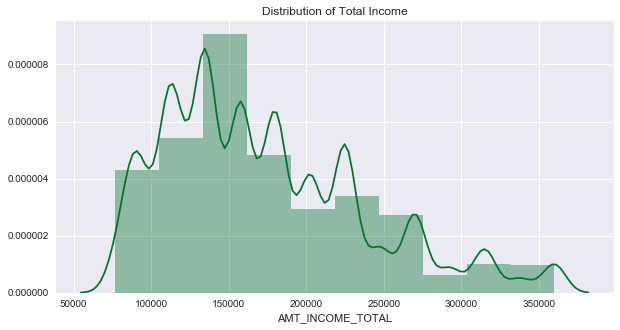

In [15]:
plt.figure(figsize = (10,5))
sns.set(palette = 'Greens_r')
plt.title('Distribution of Total Income')
ax = sns.distplot(df['AMT_INCOME_TOTAL'], bins = 10)

C:\Users\Saumit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


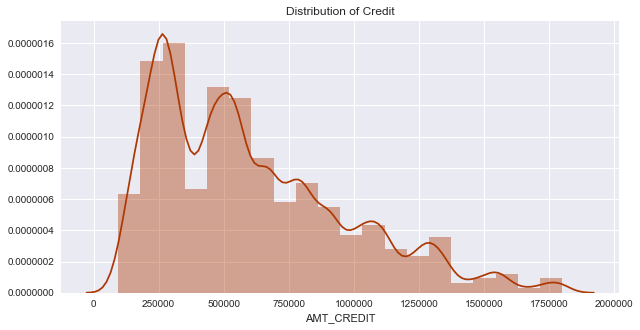

In [16]:
plt.figure(figsize = (10,5))
sns.set(palette = 'Oranges_r')
plt.title('Distribution of Credit')
ax = sns.distplot(df['AMT_CREDIT'], bins = 20)

C:\Users\Saumit\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


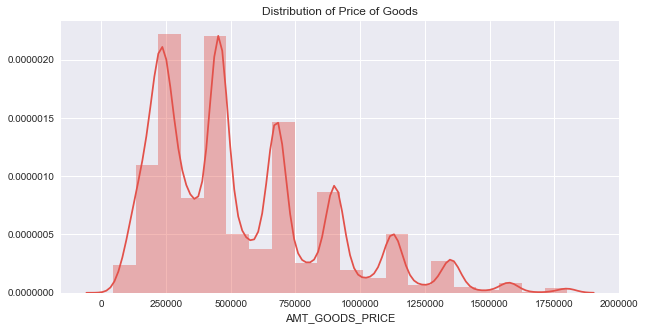

In [17]:
plt.figure(figsize = (10,5))
sns.set(palette = 'Spectral')
plt.title('Distribution of Price of Goods')
ax = sns.distplot(df['AMT_GOODS_PRICE'], bins = 20)

In [18]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,38.591781,8.295890,1.761644,13.454795,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0973,0.9806,0.7348,0.0582,0.16,0.1379,0.3333,0.3750,0.0931,0.1202,0.1397,0.0000,0.0000,0.1502,0.1010,0.9806,0.7452,0.0587,0.1611,0.1379,0.3333,0.3750,0.0952,0.1313,0.1456,0.0000,0.0000,0.1489,0.0973,0.9806,0.7383,0.0585,0.16,0.1379,0.3333,0.3750,0.0947,0.1223,0.1422,0.0000,0.0000,reg oper account,block of flats,0.1417,Panel,No,0.0,0.0,0.0,0.0,0.010959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,39.953425,0.556164,1.684932,5.632877,0.0,1,1,0,1,0,0,Laborers,2.0,2,1,MONDAY,9,0,0,0,0,0,0,Transport: type 2,0.721940,0.642656,NaN,0.3495,0.1335,0.9985,0.9796,0.1143,0.40,0.1724,0.6667,0.7083,0.1758,0.2849,0.3774,0.0193,0.1001,0.3561,0.1386,

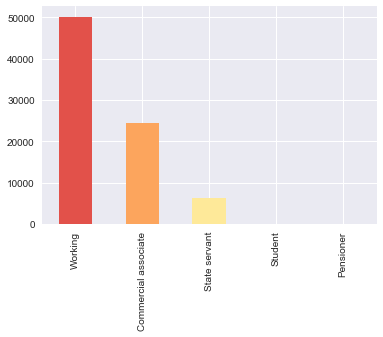

In [19]:
df['NAME_INCOME_TYPE'].value_counts().plot(kind = 'bar')

Text(0.5,1,'Default Count by Loan Type')

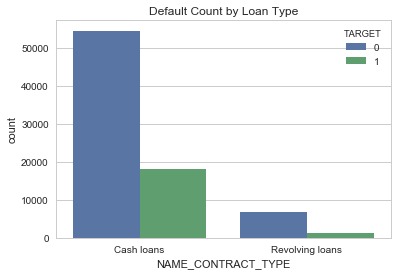

In [33]:
sns.set(style="whitegrid")
gen = sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'TARGET', data = df)
plt.title('Default Count by Loan Type')

Text(0.5,1,'Default Count by Education Type')

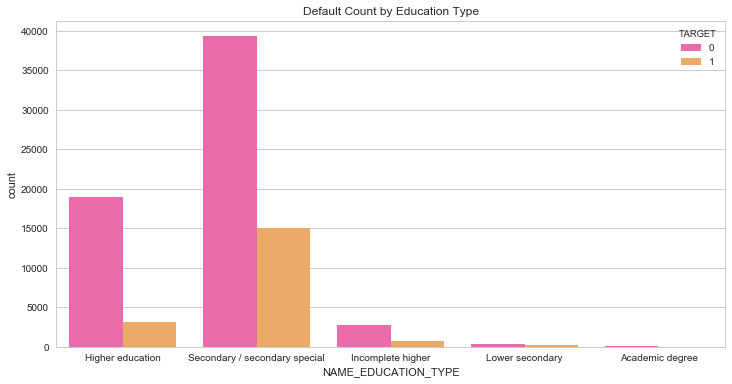

In [49]:
plt.figure(figsize = (12,6))
gen = sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'TARGET', data = df, palette = 'spring', orient = 'h')
plt.title('Default Count by Education Type')

There does not seem to be a significant difference between defaults for cash loans or revolving loans. This also holds true for education level of the applicant. The greatest number of defaults are applicants with a secondary/secondary special education, but that group also has the highest number of total applicants.

### Correlations

Let's look for correlations for each feature variable and the target variable. We will narrow it down to the top 20 highest positive and negative correlations and plot the corresponding heatmap.

In [50]:
corr = pd.DataFrame(df.corr()['TARGET'].sort_values(ascending = False))

In [51]:
#Top 20 positive correlations
corr.head(20)

,TARGET
TARGET,1.000000
REG_CITY_NOT_WORK_CITY,0.239223
REG_CITY_NOT_LIVE_CITY,0.175208
LIVE_CITY_NOT_WORK_CITY,0.168590
REGION_RATING_CLIENT_W_CITY,0.162453
REGION_RATING_CLIENT,0.131871
FLAG_DOCUMENT_3,0.080857
DEF_30_CNT_SOCIAL_CIRCLE,0.058228
FLAG_WORK_PHONE,0.058087
DEF_60_CNT_SOCIAL_CIRCLE,0.054161


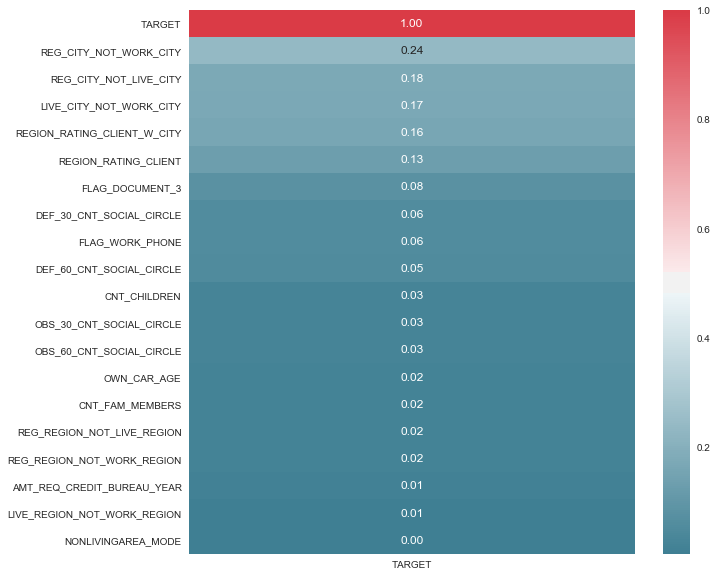

In [54]:
fig, ax = plt.subplots(figsize= (10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr.head(20), cmap= cmap, annot= True, fmt= ".2f")

In [55]:
#Top 20 negative correlations
corr.tail(20)

,TARGET
YEARS_BEGINEXPLUATATION_AVG,-0.049316
HOUR_APPR_PROCESS_START,-0.053331
FLOORSMAX_MODE,-0.054107
FLOORSMAX_MEDI,-0.055425
FLOORSMAX_AVG,-0.055832
FLAG_PHONE,-0.060854
YEARS_ID_PUBLISH,-0.064469
AMT_CREDIT,-0.070322
YEARS_REGISTRATION,-0.083205
AMT_GOODS_PRICE,-0.084784


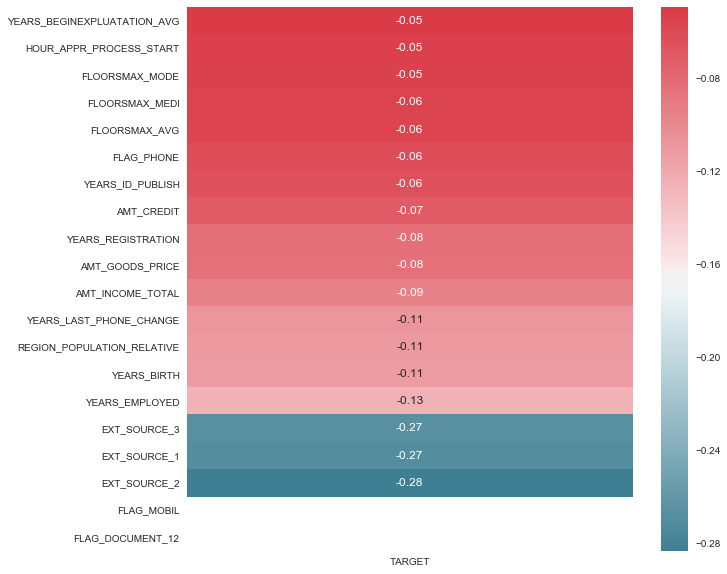

In [58]:
fig, ax = plt.subplots(figsize= (10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr.tail(20), cmap= cmap, annot= True, fmt= ".2f")

### Weight of Evidence and Information Value for Variable Selection

Weight of evidence (WOE) and information value (IV) are two concepts that are commonly used to evaluate and analyze variables for a binary classification problem. The techniques are often used for variable selection in credit modeling scenarios, such as predicting the risk of default. The code below to calculate WOE and IV is adapted from this article by Sundar Krishnan explaining the concept and uses of WOE and IV.
https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb

In [59]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [60]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)   

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)
    
    

In [61]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [62]:
final_iv, IV = data_vars(df, df.TARGET)

C:\Users\Saumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log
C:\Users\Saumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log
C:\Users\Saumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log
C:\Users\Saumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log


In [63]:
final_iv[final_iv.VAR_NAME == 'WALLSMATERIAL_MODE'].head(10)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
362,WALLSMATERIAL_MODE,Block,Block,4446,492.0,0.110661,3954.0,0.889339,0.025584,0.064427,-0.923574,2.498686
363,WALLSMATERIAL_MODE,Mixed,Mixed,835,130.0,0.155689,705.0,0.844311,0.006760,0.011487,-0.530233,2.498686
364,WALLSMATERIAL_MODE,Monolithic,Monolithic,806,58.0,0.071960,748.0,0.928040,0.003016,0.012188,-1.396530,2.498686
365,WALLSMATERIAL_MODE,Others,Others,12046,11059.0,0.918064,987.0,0.081936,0.575061,0.016082,3.576760,2.498686
366,WALLSMATERIAL_MODE,Panel,Panel,32149,3311.0,0.102989,28838.0,0.897011,0.172170,0.469889,-1.004014,2.498686
367,WALLSMATERIAL_MODE,Stone/brick,Stone/brick,28497,3769.0,0.132260,24728.0,0.867740,0.195986,0.402920,-0.720696,2.498686
368,WALLSMATERIAL_MODE,Wooden,Wooden,1824,412.0,0.225877,1412.0,0.774123,0.021424,0.023007,-0.071309,2.498686


Using the Information Values produced, we will start the first step of feature selection by examining the IV for each feature and evaluating it based on the criteria given by the following chart:

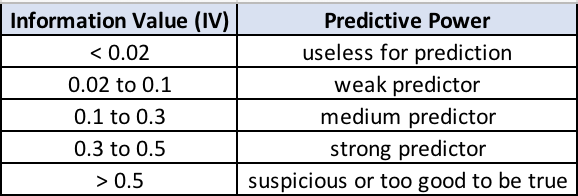

Our personal criteria to retain a feature will be IV > 0.1 and IV < 0.7

Additionally, we will merge the IV dataframe with the correlations we calculated earlier for each feature. This will give a more comprehensive picture as we will consider retaining features that have reasonable correlation despite having IV values outside of the criteria.

In [64]:
pd.set_option('display.precision', 10)
IV_corr = pd.merge(IV, corr, left_on = 'VAR_NAME', right_on = corr.index, how='outer')

In [65]:
IV_corr.sort_values('TARGET', ascending = True)

,VAR_NAME,IV,TARGET
32,EXT_SOURCE_2,0.4483305470,-0.2830538831
31,EXT_SOURCE_1,0.2537862926,-0.2697068298
33,EXT_SOURCE_3,0.3297270986,-0.2658978736
117,YEARS_EMPLOYED,0.0983937508,-0.1255106516
113,YEARS_BIRTH,0.0726468325,-0.1116701395
99,REGION_POPULATION_RELATIVE,0.0503266048,-0.1104818574
119,YEARS_LAST_PHONE_CHANGE,0.0632976117,-0.1072746468
3,AMT_INCOME_TOTAL,0.0499624266,-0.0942265236
2,AMT_GOODS_PRICE,0.0544845901,-0.0847837970
120,YEARS_REGISTRATION,0.0298794412,-0.0832050275


Narrow down feature set on the following criteria:
- 0.1 < IV < 0.7
- corr < -0.09 or corr > 0.13

In [66]:
feature_IV_corr = IV_corr[((IV_corr.IV > 0.1) & (IV_corr.IV < 0.7)) | ((IV_corr.TARGET < -0.09) | (IV_corr.TARGET > 0.13))]

In [67]:
print(feature_IV_corr.shape)
feature_IV_corr.sort_values('TARGET', ascending = False)

(44, 3)


,VAR_NAME,IV,TARGET
121,TARGET,NaN,1.0000000000
103,REG_CITY_NOT_WORK_CITY,0.2740499999,0.2392230042
102,REG_CITY_NOT_LIVE_CITY,0.1367719753,0.1752079480
74,LIVE_CITY_NOT_WORK_CITY,0.1365900595,0.1685899204
101,REGION_RATING_CLIENT_W_CITY,0.0620973227,0.1624532032
100,REGION_RATING_CLIENT,0.0318664106,0.1318711561
93,NONLIVINGAREA_MODE,0.5772567299,0.0047231934
92,NONLIVINGAREA_MEDI,0.5615636215,0.0033489205
91,NONLIVINGAREA_AVG,0.5567776848,0.0031710843
73,LANDAREA_MODE,0.5571862517,-0.0071578120


We are down to 43 dependent variables. Let's create a new dataframe using all rows from our initial dataframe but only choosing columns that have been narrowed down using feature selection.

In [68]:
selected_features = df.loc[:,feature_IV_corr['VAR_NAME'].tolist()]

Note that the new dataframe has the same number of rows as before but only 44 columns.

In [69]:
print(selected_features.shape)
selected_features.head()

(80603, 44)


,AMT_INCOME_TOTAL,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_EDUCATION_TYPE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET
0,270000.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0.0345,0.0345,0.0345,0.3112673114,0.6222457753,NaN,0.2917,0.2917,0.2917,0.0130,0.0132,0.0128,0,0.0549,0.0558,0.0554,Higher education,0.0098,0.0100,0.0000,Core staff,0.003541,1,1,0,0,0.0714,0.9851,0.9851,0.9851,45.9315068493,0.7960,0.7987,0.8040,3.2547945205,2.2684931507,0
1,225000.0,0.1474,0.1489,0.1502,0.0973,0.0973,0.1010,0.1379,0.1379,0.1379,NaN,0.5669066132,0.7700870700,0.3333,0.3333,0.3333,0.0931,0.0947,0.0952,0,0.1397,0.1422,0.1456,Secondary / secondary special,0.0000,0.0000,0.0000,Drivers,0.016612,2,2,0,0,0.1417,0.9806,0.9806,0.9806,38.5917808219,0.7348,0.7383,0.7452,8.2958904110,0.0109589041,0
2,189000.0,0.3495,0.3529,0.3561,0.1335,0.1335,0.1386,0.1724,0.1724,0.1724,0.7219397687,0.6426562048,NaN,0.6667,0.6667,0.6667,0.1758,0.1789,0.1798,0,0.3774,0.3842,0.3932,Secondary / secondary special,0.1001,0.1022,0.1060,Laborers,0.010006,2,1,0,0,0.3811,0.9985,0.9985,0.9985,39.9534246575,0.9796,0.9799,0.9804,0.5561643836,0.5150684932,0
3,112500.0,0.0278,0.0281,0.0284,0.0617,0.0617,0.0640,0.1034,0.1034,0.1034,NaN,0.7064284029,0.5567274264,0.0833,0.0833,0.0833,0.0279,0.0284,0.0286,0,0.0290,0.0295,0.0302,Secondary / secondary special,0.0000,0.0000,0.0000,Laborers,0.046220,1,1,0,0,0.0238,0.9881,0.9881,0.9881,48.5424657534,0.8368,0.8390,0.8432,21.3808219178,0.6547945205,0
4,135000.0,0.1433,0.1447,0.1460,0.1455,0.1455,0.1509,0.3103,0.3103,0.3103,NaN,0.7861793091,0.5656079814,0.1667,0.1667,0.1667,0.0861,0.0876,0.0881,1,0.1217,0.1239,0.1268,Secondary / secondary special,0.0043,0.0044,0.0045,Drivers,0.026392,2,2,0,1,0.0967,0.9861,0.9861,0.9861,30.9205479452,0.8096,0.8121,0.8171,2.0438356164,0.0109589041,0


Impute missing values for EXT_SOURCE_1,  EXT_SOURCE_2, EXT_SOURCE_3

In [70]:
selected_features['EXT_SOURCE_1'].fillna(selected_features['EXT_SOURCE_1'].mean(), inplace = True)
selected_features['EXT_SOURCE_2'].fillna(selected_features['EXT_SOURCE_2'].mean(), inplace = True)
selected_features['EXT_SOURCE_3'].fillna(selected_features['EXT_SOURCE_3'].mean(), inplace = True)

### Multicollinearity

Our final step in feature selection is to check our features for multiple independent variables that are highly correlated with each other. To measure multicollinearity, we will calculate the Variance Inflation Factor (VIF) and eliminate features that have a VIF > 5.

In [71]:
from sklearn import linear_model

The following function will calculate the Variance Inflation Factor, which is defined as 1/(1-R^2). The function will take in a dataframe and calculate a linear regression for each feature. Each feature will serve as an independent variable, and the function will calculate R^2 and VIF scores for each feature and return the results in a dataframe.

In [72]:
def var_inf_factor(df):
    df = df._get_numeric_data()
    lin_reg = []
    for i in df:
        X = df[df.columns[~df.columns.isin([i])]]
        y = df[i]
        lm = linear_model.LinearRegression()
        model = lm.fit(X,y)
        predictions = lm.predict(X)
        lin_reg.append({'Features':i, 'R^2': lm.score(X,y), 'VIF': 1/(1-lm.score(X,y))})    
    return pd.DataFrame(lin_reg)

In [73]:
#df2.drop(columns = ['YEARS_BUILD_AVG'], inplace = True)
#var_inf_factor(df2)

#copy dataframe in case things go awry - also checkpointed here
df2 = selected_features.copy()

In [74]:
var_inf_factor(selected_features)

,Features,R^2,VIF
0,AMT_INCOME_TOTAL,0.0899999258,1.0989010092
1,APARTMENTS_AVG,0.9913968927,116.2370719001
2,APARTMENTS_MEDI,0.9936449178,157.3543771918
3,APARTMENTS_MODE,0.9821585191,56.0491590071
4,BASEMENTAREA_AVG,0.9908579277,109.3843895035
5,BASEMENTAREA_MEDI,0.9918485277,122.6772251083
6,BASEMENTAREA_MODE,0.9699271858,33.2526245049
7,ENTRANCES_AVG,0.9949178378,196.7666435829
8,ENTRANCES_MEDI,0.9955912344,226.8208580431
9,ENTRANCES_MODE,0.9772718187,43.9982411345


After the first run through, we will delete the feature with the highest VIF and run the analysis again, this time with one less feature. We will iteratively go through this process until all remaining features have a VIF < 5.

In [75]:
#Drop highest VIF feature, YEARS_BUILD_AVG
selected_features.drop(columns = ['YEARS_BUILD_AVG'], inplace = True)
var_inf_factor(selected_features)

,Features,R^2,VIF
0,AMT_INCOME_TOTAL,0.0899811777,1.0988783698
1,APARTMENTS_AVG,0.9913968922,116.2370651990
2,APARTMENTS_MEDI,0.9936445548,157.3453896749
3,APARTMENTS_MODE,0.9821562470,56.0420219865
4,BASEMENTAREA_AVG,0.9908475361,109.2601957226
5,BASEMENTAREA_MEDI,0.9918449669,122.6236593887
6,BASEMENTAREA_MODE,0.9699119871,33.2358272789
7,ENTRANCES_AVG,0.9949164378,196.7124567929
8,ENTRANCES_MEDI,0.9955897339,226.7436865367
9,ENTRANCES_MODE,0.9772715941,43.9978062497


In [76]:
#Drop features with 5 highest VIF
selected_features.drop(columns = ['APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI'], inplace = True)
var_inf_factor(selected_features)

,Features,R^2,VIF
0,AMT_INCOME_TOTAL,0.0898402710,1.0987082466
1,APARTMENTS_AVG,0.9766491838,42.8250554504
2,APARTMENTS_MODE,0.9760728853,41.7935891028
3,BASEMENTAREA_AVG,0.9645549733,28.2127027213
4,BASEMENTAREA_MODE,0.9653411621,28.8526696321
5,ENTRANCES_AVG,0.9733672670,37.5477800721
6,ENTRANCES_MODE,0.9733909156,37.5811502616
7,EXT_SOURCE_1,0.1622268585,1.1936405579
8,EXT_SOURCE_2,0.2127228624,1.2702007365
9,EXT_SOURCE_3,0.0913450982,1.1005278220


In [77]:
#Drop 5 more
selected_features.drop(columns = ['APARTMENTS_AVG', 'BASEMENTAREA_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_AVG', 'LANDAREA_MEDI'], inplace = True)
var_inf_factor(selected_features)

,Features,R^2,VIF
0,AMT_INCOME_TOTAL,0.0895065520,1.0983055422
1,APARTMENTS_MODE,0.8382485935,6.1823264576
2,BASEMENTAREA_AVG,0.5505860811,2.2251202245
3,ENTRANCES_AVG,0.6240288841,2.6597787907
4,EXT_SOURCE_1,0.1621760795,1.1935682135
5,EXT_SOURCE_2,0.2126174567,1.2700306966
6,EXT_SOURCE_3,0.0912605723,1.1004254570
7,FLOORSMAX_MODE,0.6572941308,2.9179541109
8,LANDAREA_AVG,0.9415823620,17.1181176560
9,LANDAREA_MODE,0.9425243391,17.3986690015


In [78]:
#Drop 5 more
selected_features.drop(columns = ['LIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_MEDI', 'LANDAREA_MODE'], inplace = True)
var_inf_factor(selected_features)

,Features,R^2,VIF
0,AMT_INCOME_TOTAL,0.0890136244,1.0977112576
1,APARTMENTS_MODE,0.8365340569,6.1174822156
2,BASEMENTAREA_AVG,0.5469812629,2.2074142154
3,ENTRANCES_AVG,0.6210087663,2.6385834578
4,EXT_SOURCE_1,0.1621333675,1.1935073689
5,EXT_SOURCE_2,0.2125526684,1.2699262032
6,EXT_SOURCE_3,0.0911978831,1.1003495496
7,FLOORSMAX_MODE,0.6531850715,2.8833822245
8,LANDAREA_AVG,0.2904049477,1.4092544709
9,LIVE_CITY_NOT_WORK_CITY,0.8032169264,5.0817378845


In [79]:
selected_features.drop(columns = ['NONLIVINGAREA_AVG', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'YEARS_BEGINEXPLUATATION_MEDI'], inplace = True)
var_inf_factor(selected_features)

,Features,R^2,VIF
0,AMT_INCOME_TOTAL,0.0804507910,1.0874893809
1,APARTMENTS_MODE,0.8361140866,6.1018056977
2,BASEMENTAREA_AVG,0.5456864271,2.2011228798
3,ENTRANCES_AVG,0.6207290393,2.6366374008
4,EXT_SOURCE_1,0.1620085644,1.1933296184
5,EXT_SOURCE_2,0.2120582517,1.2691293514
6,EXT_SOURCE_3,0.0911565362,1.1002994904
7,FLOORSMAX_MODE,0.6519989833,2.8735548230
8,LANDAREA_AVG,0.2897899690,1.4080341818
9,LIVE_CITY_NOT_WORK_CITY,0.0525571256,1.0554726063


In [80]:
selected_features.drop(columns = ['LIVINGAREA_MODE'], inplace = True)
var_inf_factor(selected_features)

,Features,R^2,VIF
0,AMT_INCOME_TOTAL,0.0804497924,1.0874881999
1,APARTMENTS_MODE,0.7625441889,4.2113098655
2,BASEMENTAREA_AVG,0.5434912528,2.1905385301
3,ENTRANCES_AVG,0.6085559066,2.5546432223
4,EXT_SOURCE_1,0.1619463174,1.1932409829
5,EXT_SOURCE_2,0.2120582383,1.2691293299
6,EXT_SOURCE_3,0.0911323205,1.1002701741
7,FLOORSMAX_MODE,0.6438688483,2.8079543031
8,LANDAREA_AVG,0.2888475800,1.4061683148
9,LIVE_CITY_NOT_WORK_CITY,0.0523566374,1.0552493052


All remaining features have VIF < 5! We will now export this dataframe to a CSV file.

In [81]:
selected_features.shape

(80603, 23)

In [82]:
selected_features.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE,NONLIVINGAREA_MODE,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET
0,270000.0,0.0924,0.0529,0.0345,0.3112673114,0.6222457753,0.4811206084,0.2917,0.0130,0,Higher education,0.0000,Core staff,0.003541,1,0,0.0714,0.9851,45.9315068493,0.8040,3.2547945205,2.2684931507,0
1,225000.0,0.1502,0.0973,0.1379,0.4788604786,0.5669066132,0.7700870700,0.3333,0.0931,0,Secondary / secondary special,0.0000,Drivers,0.016612,2,0,0.1417,0.9806,38.5917808219,0.7452,8.2958904110,0.0109589041,0
2,189000.0,0.3561,0.1335,0.1724,0.7219397687,0.6426562048,0.4811206084,0.6667,0.1758,0,Secondary / secondary special,0.1060,Laborers,0.010006,2,0,0.3811,0.9985,39.9534246575,0.9804,0.5561643836,0.5150684932,0
3,112500.0,0.0284,0.0617,0.1034,0.4788604786,0.7064284029,0.5567274264,0.0833,0.0279,0,Secondary / secondary special,0.0000,Laborers,0.046220,1,0,0.0238,0.9881,48.5424657534,0.8432,21.3808219178,0.6547945205,0
4,135000.0,0.1460,0.1455,0.3103,0.4788604786,0.7861793091,0.5656079814,0.1667,0.0861,1,Secondary / secondary special,0.0045,Drivers,0.026392,2,0,0.0967,0.9861,30.9205479452,0.8171,2.0438356164,0.0109589041,0


### Create CSV File

In [83]:
selected_features.to_csv('feature_selected_train.csv', index = False)